In [1]:
# Importamos todas las librerías necesarias
# ==============================================================================

import numpy as np#módulo para utilizar operaciones matemáticas
import pandas as pd#librería para manejar datos en formato dataframe
import matplotlib#librería de gráficos
from matplotlib import pyplot as plt#libería de gráficos
import seaborn as sns#librería de gráficos
from sklearn import datasets#generación de datasets
from sklearn.svm import SVC#support vector machine classifier
from sklearn.model_selection import train_test_split#módulo para generar conjuntos de entrenamientos y test
from sklearn.datasets import make_circles#generación de conjuntos de datos 
from sklearn.model_selection import GridSearchCV # búsqueda en malla de hiperparámetros
import multiprocessing#módulo para controlar hilos de procesamiento
from sklearn.metrics import accuracy_score #métrica para evaluación de modelos
from sklearn.metrics import classification_report #reporte de métricas para evaluación de modelos
from sklearn.metrics import confusion_matrix #matriz de correlaciones para evaluar modelos
from sklearn.tree import DecisionTreeClassifier# clasficador de Arboles de decision
from sklearn.ensemble import RandomForestClassifier #clasficador de random forest

sns.set()#establecemos el estilo de la librería seaborn

# Algunos enlaces en los que nos hemos apoyado
# ==============================================================================

# https://www.geeksforgeeks.org/ml-using-svm-to-perform-classification-on-a-non-linear-dataset/
# https://www.cienciadedatos.net/documentos/py24-svm-python.html
# https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines#Support_Vector_Machines_para_m%C3%A1s_de_dos_clases        

## 1. SVM para clasificar datos linealmente separables

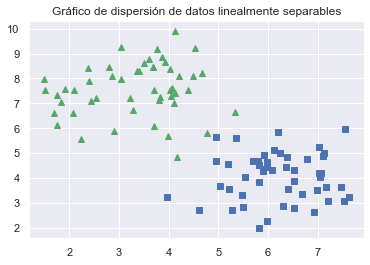

In [2]:
# Mostramos un gráfico de dispersión con datos linealmente separables
# ==============================================================================
X1, y1 = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(2,10))
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'g^')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'bs')
plt.title('Gráfico de dispersión de datos linealmente separables')
plt.show()

##### Creamos un modelo de SVM para clasificar estos datos y analizaremos el resultado numética y gráficamente

In [3]:
# Creamos el conjunto de datos de entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X1,
                                        y1,
                                        train_size   = 0.7,
                                        random_state = 1234,
#                                         shuffle      = True
                                    )

modelo_1 = SVC(C = 20, kernel = 'linear', random_state=123)
modelo_1.fit(X_train, y_train)

# Predicciones test
# ==============================================================================
predicciones = modelo_1.predict(X_test)
predicciones

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print("El accuracy de test es: {}".format(accuracy))


El accuracy de test es: 1.0


##### Creamos una función para mostrar poder mostrar los resultados de la clasificación y los vectores soporte
Utilizamos la siguiente referencia: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [4]:
# Función para mostrar los vectores soporte 
# ==============================================================================
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

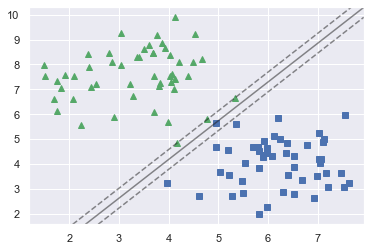

In [5]:
# Mostramos la gráfica de dispersión de los datos pero con los vectores soporte
# ==============================================================================
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'g^')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'bs')
plot_svc_decision_function(modelo_1);

##### Conclusiones
Observamos los vectores soporte y el buen desempeño del modelo consiguiendo clasificar el 83% de los datos de forma correcta

## 2. SVM para clasificar datos linealmente no separables

C:\Users\jdani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

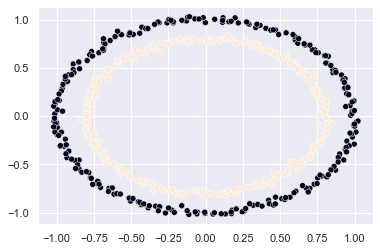

In [6]:
# Creamos un conjunto de datos linealmente no separable
# ==============================================================================
X2, Y2 = make_circles(n_samples = 500, noise = 0.02)
  
# Mostramos un gráfico de dispersión con datos linealmente no separables
# ==============================================================================
sns.scatterplot(X2[:, 0], X2[:, 1], c=Y2)

#### En esta ocasión utilizamos el kernel lineal de SVM en datos no separables linealmente para ver los resultados 

In [7]:
# Creamos el conjunto de datos de entrenamiento y test
# ==============================================================================
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                        X2,
                                        Y2,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creamos el modelo de clasificación SVM para este conjunto de datos con el kernel lineal
# ==============================================================================
modelo_2 = SVC( C = 100, kernel = 'linear', random_state=123)
modelo_2.fit(X_train_2, y_train_2)

# Predicciones de datos de test
# ==============================================================================
predicciones_2 = modelo_2.predict(X_test_2)
predicciones_2

# Accuracy de test del modelo 
# ==============================================================================
accuracy_2 = accuracy_score(
            y_true    = y_test_2,
            y_pred    = predicciones_2,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy_2}%")


El accuracy de test es: 44.666666666666664%


##### Conclusiones
El resultado en esta prueba es muy pobre, obteniendo un 45,3% de Accuracy. Este rendimiento se ve reflejado en la siguiente gráfica.

C:\Users\jdani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


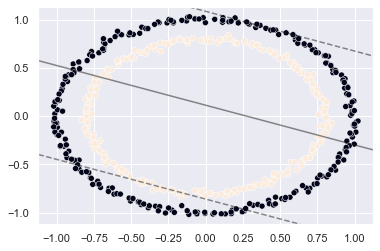

In [8]:
# Visualizamos la clasficación realizada con SVM para este conjunto de datos
# ==============================================================================
sns.scatterplot(X2[:, 0], X2[:, 1], c=Y2)
plot_svc_decision_function(modelo_2)

#### A continuación utilizamos el kernel RBF (Radial Basics Function), el cual es un kernel utilizado para datos que no son linealmente separables

In [9]:
# Creamos el modelo con el nuevo kernel RBF
# ==============================================================================
modelo_3 = SVC( C= 100, kernel = 'rbf', random_state=123)
modelo_3.fit(X_train_2, y_train_2)

# Predicciones test
# ==============================================================================
predicciones_3 = modelo_3.predict(X_test_2)
predicciones_3

# Accuracy de test del modelo 
# ==============================================================================
accuracy_3 = accuracy_score(
            y_true    = y_test_2,
            y_pred    = predicciones_3,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy_3}%")


El accuracy de test es: 100.0%


C:\Users\jdani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


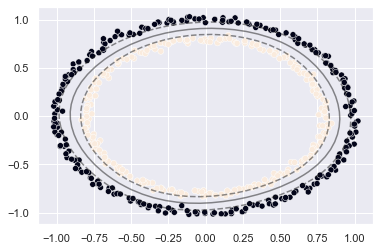

In [10]:
# Mostramos los resultados de la clasificación con este nuevo kernel
# ==============================================================================
sns.scatterplot(X2[:, 0], X2[:, 1], c=Y2)
plot_svc_decision_function(modelo_3)

##### Conclusiones
En este caso la clasificación es perfecta, pudiendo separar todos los datosde forma correcta



## 3. Comparativa de modelos de clasificación con SVM
En este apartado, vamos a realizar un preprocesado sobre el siguiente 
[conjunto de datos sobre el cáncer de mama](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)), siendo el objetivo clasificar si se trata de tumores malignos (class = 4) o benignos (class = 2). Aplicaremos técnicas de análisis de valores nulos, ruido, imputación de valores y análisis de correlaciones.

Una vez tratado los datos, procedemos a realizar una comparativa de rendimiento de modelos clasificación. Para ello utilizaremos, además de SVM, el clasficador basado en DecisionTree, RandomForest y ExtremeGradientBoosting(XGB) y realizaremos una comparativa del desempeño de cada uno.

In [11]:
# Cargamos el conjunto de datos
# ==============================================================================
df = pd.read_csv('breast-cancer-wisconsin.data', names = ['id_number', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'singles_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'])
df.head()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,singles_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
# Mostramos información sobre los datos, como por ejemplo valores faltantes o el tipo 
# de datos de cada variable
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_number                     699 non-null    int64 
 1   clump_thickness               699 non-null    int64 
 2   uniformity_of_cell_size       699 non-null    int64 
 3   uniformity_of_cell_shape      699 non-null    int64 
 4   marginal_adhesion             699 non-null    int64 
 5   singles_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                   699 non-null    object
 7   bland_chromatin               699 non-null    int64 
 8   normal_nucleoli               699 non-null    int64 
 9   mitoses                       699 non-null    int64 
 10  class                         699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


###### Sabiendo que todos las variables deberían ser numéricas, nos llama la atención que la variable 'bare_nuclei' sea del tipo object. La analizaremos en las siguientes celdas

In [13]:
# Comprobamos específicamente el porcentaje de nulos
# ==============================================================================
df.isnull().sum()/len(df)

id_number                       0.0
clump_thickness                 0.0
uniformity_of_cell_size         0.0
uniformity_of_cell_shape        0.0
marginal_adhesion               0.0
singles_epithelial_cell_size    0.0
bare_nuclei                     0.0
bland_chromatin                 0.0
normal_nucleoli                 0.0
mitoses                         0.0
class                           0.0
dtype: float64

In [14]:
# Analizamos los valores únicos de la variable 'bare_nuclei'
# ==============================================================================
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

##### Observamos la razón por la que esa variable se le ha asignado el tipo objectm y es porque entre sus valores contiene un caracter no numérico

In [15]:
# Realizamos un filtro para eliminar aquellos registros que contienen el valor '?'
# ==============================================================================
df = df[df['bare_nuclei'] != '?' ]

In [16]:
# Comprobamos de nuev los valores únicos de esta variable
# ==============================================================================
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [17]:
# Transformamos esa variable a tipo numérica
# ==============================================================================
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

In [18]:
# Comprobamos de nuevo el tipo de datos de nuestras variables
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   id_number                     683 non-null    int64
 1   clump_thickness               683 non-null    int64
 2   uniformity_of_cell_size       683 non-null    int64
 3   uniformity_of_cell_shape      683 non-null    int64
 4   marginal_adhesion             683 non-null    int64
 5   singles_epithelial_cell_size  683 non-null    int64
 6   bare_nuclei                   683 non-null    int64
 7   bland_chromatin               683 non-null    int64
 8   normal_nucleoli               683 non-null    int64
 9   mitoses                       683 non-null    int64
 10  class                         683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [19]:
### Vemos todos los valores únicos de cada variable excluyendo la variable id
[df[a].unique() for a in df.columns[1:]]

[array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64),
 array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64),
 array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64),
 array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64),
 array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9], dtype=int64),
 array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64),
 array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10], dtype=int64),
 array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64),
 array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64),
 array([2, 4], dtype=int64)]

In [20]:
# Eliminamos la variable 'id' que no nos hace falta para desarrollar los modelos de
# clasificación y de hecho nos puede perjudicar, aportando datos estériles para 
# la tarea de clasificación
# ==============================================================================
df_without_id = df[['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'singles_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class']]
df_without_id.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,singles_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [21]:
# Reemplazamos los valores 2 y 4 de la variable objetivo por 0s y 1s respectivamente
# ==============================================================================
df_without_id['class'] = df_without_id['class'].replace([2,4],[0,1])

C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/3987657136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_id['class'] = df_without_id['class'].replace([2,4],[0,1])


In [22]:
# Comprobamos que el cambio se ha hecho correctamente
# ==============================================================================
df_without_id['class'].unique()

array([0, 1], dtype=int64)

0    444
1    239
Name: class, dtype: int64


<AxesSubplot:title={'center':'Recuento de atributos de clase objetivo'}>

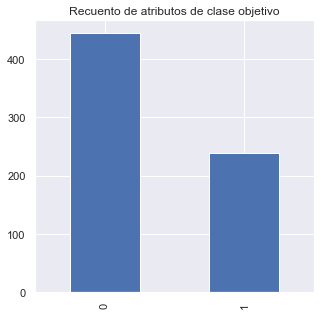

In [23]:
# Estudiamos el balanceo de la variable objetivo, por si hay que aplicar técnicas 
# de rebalanceo
# ==============================================================================
print(df_without_id['class'].value_counts())

df_without_id['class'].value_counts().plot(kind='bar', title='Recuento de atributos de clase objetivo',figsize=(5,5))

###### Conclusiones 
En este caso, existen casi el doble de valores 0's que 1's. Igualmente probaremos los modelos sin aplicar ninguna técnica de remuestreo y valoraremos cómo se comporta con las diferentes clases.+

### Correlación de Pearson
A continuación vamos a realizar un análisis de correlaciones entre las variables contínuas que tenemos en nuestro dataset. Este procedimiento tiene por objetivo indicarnos si existe relación entre dos eventos – es decir, variables–, un poco sobre la naturaleza de dicha relación, y su fuerza.

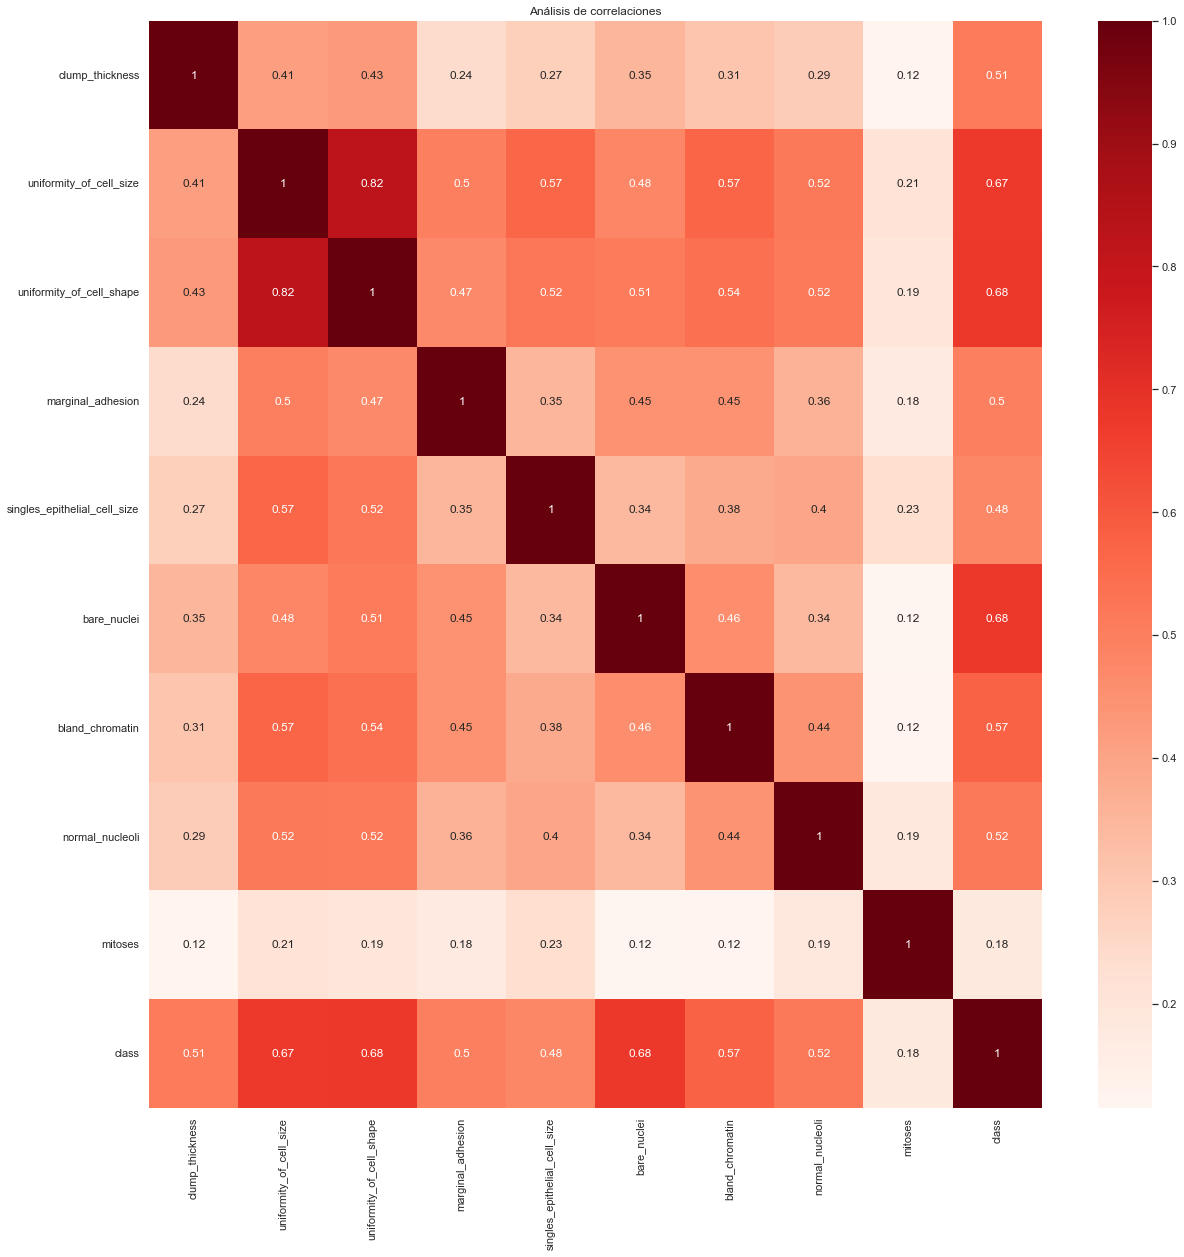

In [28]:
# Correlación de Pearson
# ==============================================================================
plt.figure(figsize=(20,20))
cor = df_without_id.corr()
sns.heatmap(cor**2, annot=True, cmap=plt.cm.Reds, )
plt.title("Análisis de correlaciones")
plt.show()

##### Conclusiones
Observando las correlaciones de las variables con la variable objetivo, vemos que todas las variables excepto 'mitoses' tienen una cierta correlación. Estableciendo como umbral 0.75, ninguna está altamente correlacionada. 

### 3.1. Clasificando con SVM
Empezamos el modelado utilizando **SVM** con kernel lineal y aplicando la Búsqueda exhaustiva de valores en malla para diferentes valores de C (márgen de los vectores soporte) y validación cruzada.

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 30} : 0.9644261006289309 accuracy

Matriz de confusión
-------------------
[[130   2]
 [  2  71]]

El accuracy de test es: 98.04878048780488 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.97      0.97      0.97        73

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1533790704.py:89: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1533790704.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1533790704.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


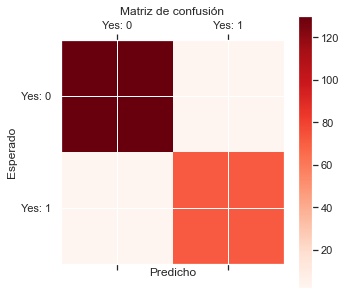

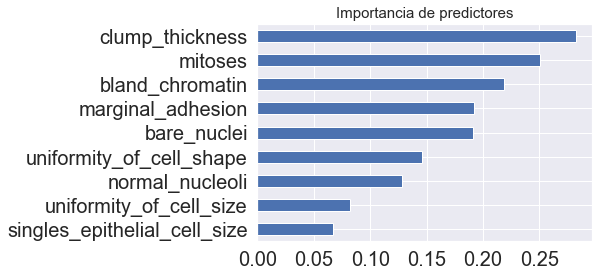

In [24]:
# Conjuntos de datos de entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    df_without_id.drop(columns = 'class'),
    df_without_id['class'],
    random_state = 123,
    train_size=0.7,
    shuffle=True
    )


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'C': [30,70,100,150]}
# param_grid = {'C': [100]}


# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
    estimator  = SVC(kernel= "linear"),
    param_grid = param_grid,
    scoring= 'accuracy',
    n_jobs = multiprocessing.cpu_count() - 1,
    cv = 3, 
    verbose= 0,
    return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
# ==============================================================================
grid.fit(X = X_train, y = y_train)

# Se obtiene el mejor estimador
# ==============================================================================

modelo_final = grid.best_estimator_


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Mejores hiperparámetros por validación cruzada
# ==============================================================================

predicciones = modelo_final.predict(X = X_test)

# Calculamos la matriz de confusion
# ==============================================================================

print("\nMatriz de confusión")
print("-------------------")
matriz_confusion = confusion_matrix(
y_true= y_test,
y_pred= predicciones
)
print(matriz_confusion)

# Calculamos el accuracy
# ==============================================================================

accuracy = accuracy_score(
y_true= y_test,
y_pred= predicciones,
# normalize = True
   )
print(f"\nEl accuracy de test es: {100 * accuracy} %\n")

# Calculamos las métricas
# ==============================================================================

print('-----------------------------------')
print('Classification Report')
print('-----------------------------------')
report = classification_report(y_test, predicciones)
print(report)

# Representamos la matriz de confusión en mapa de calor
# ==============================================================================

labels= ['Yes: 0', 'Yes: 1']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_title('Matriz de confusión')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Esperado')
plt.show()

data = pd.Series(abs(grid.best_estimator_.coef_[0]), index=df_without_id.drop(columns = 'class').columns).nlargest(10).sort_values(ascending = True)
data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
plt.title('Importancia de predictores', fontsize = 15)
plt.show()



###### Conclusiones
Observando las métricas de Accuracy y Recall, podemos asegurar que el manejo de ambas clases(0's y 1's) es fantástico, tal como queda reflejado en la matriz de confusión. Para este caso, las variables predictores más importantes son **clump_thickness, mitoses y bland_chromatin**.

### 3.2 Clasificando con DecisionTree
A continuación vamos a realizar el mismo test que hemos realizado con el conjunto de datos anterior, pero esta vez aplicando el clasificador basado en **DecisionTree**, haciendo búsqueda en malla sobre varios parámetros de ccp_alpha.  Esta variable se utiliza para poder aplicar un proceso de prunning o podado del árbol, en el que se deja crecer el árbol al máximo para luego podarlo y obtener el modelo más óptimo.

Explicación en profundidad de las ventajas de Prunning o podado.

[Explicación](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)


Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 7
Número de nodos terminales: 26

Matriz de confusión
-------------------
[[130   2]
 [  3  70]]

El accuracy de test es: 97.5609756097561 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.97      0.96      0.97        73

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1002651371.py:78: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1002651371.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/1002651371.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


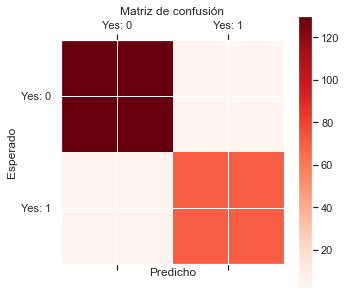

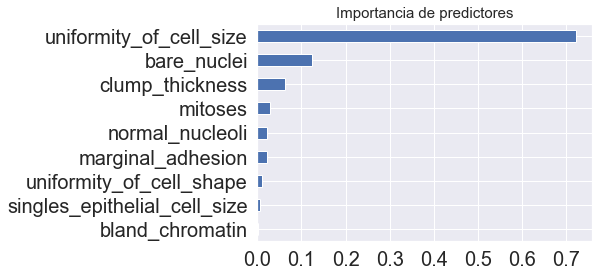

In [25]:
# Conjuntos de datos de entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    df_without_id.drop(columns = 'class'),
    df_without_id['class'],
    random_state = 123,
    train_size=0.7,
    shuffle=True
    )


# Post pruning (podado del árbol) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
    # El árbol se crece al máximo posible antes de aplicar el pruning
    estimator = DecisionTreeClassifier(
            max_depth = None,
            min_samples_split = 2,
            min_samples_leaf  = 1,
            random_state  = 123
               ),
        param_grid = param_grid,
        scoring= 'accuracy',
        cv = 10,
        refit  = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
print("\nMejor parámetro de modelo tras la validación cruzada")
print("-------------------")
print('\n',grid.best_params_)

# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"\nProfundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

predicciones = modelo_final.predict(X = X_test)

print("\nMatriz de confusión")
print("-------------------")
matriz_confusion = confusion_matrix(
y_true= y_test,
y_pred= predicciones
)
print(matriz_confusion)


accuracy = accuracy_score(
y_true= y_test,
y_pred= predicciones,
# normalize = True
   )
print(f"\nEl accuracy de test es: {100 * accuracy} %\n")

print('-----------------------------------')
print('Classification Report')
print('-----------------------------------')
report = classification_report(y_test, predicciones)
print(report)

# Matriz de confusión con mapa de calor
# ==============================================================================

labels= ['Yes: 0', 'Yes: 1']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_title('Matriz de confusión')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Esperado')
plt.show()


data = pd.Series(abs(modelo_final.feature_importances_), index=df_without_id.drop(columns = 'class').columns).nlargest(10).sort_values(ascending = True)
data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
plt.title('Importancia de predictores', fontsize = 15)
plt.show()

##### Conclusiones
En este caso también obtenemos un rendimiento y manejo de clases excelente. El mejor modelo escogido en este caso es con ccp_alpha:0, por lo que no se ha requerido podar el árbol. Destacamos que en este caso la variable predictora principal a sido uniformity_of_cell_size con más de un 70% de importancia.

###  Clasificando con  RandomForest
En este apartado realizaremos las mismas pruebas que hemos realizado anteriormente pero utilizando el clasificador RandomForest, y realizando validación cruzada y busqueda en malla de los parámetros **n_estimators, max_features, max_depth, criterion**.

Para una explicación más profunda sobre los parámetros calibrados [pinche aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 250} : 0.9727987421383647 accuracy

Matriz de confusión
-------------------
[[129   3]
 [  0  73]]

El accuracy de test es: 98.53658536585365 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.96      1.00      0.98        73

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.98       205
weighted avg       0.99      0.99      0.99       205



C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/750484912.py:95: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/750484912.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\jdani\AppData\Local\Temp/ipykernel_17684/750484912.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


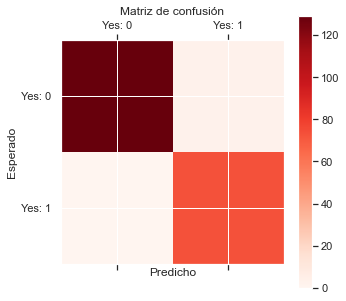

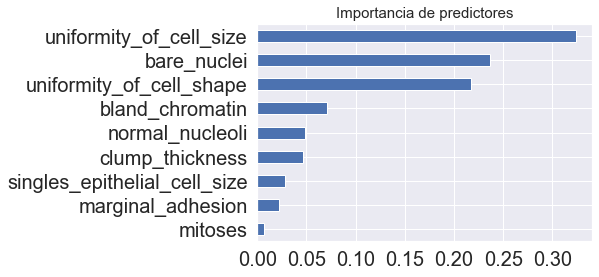

In [26]:
# Conjuntos de datos de entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
        df_without_id.drop(columns = 'class'),
        df_without_id['class'],
        random_state = 123,
        train_size=0.7,
        shuffle=True
        )


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150,250,350],
      'max_features': [5, 7, 9],
      'max_depth'   : [None, 30],
      'criterion'   : ['gini', 'entropy']
     }

# Búsqueda por grid search con validación cruzada del mejor estimador
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring= 'accuracy',
        n_jobs = multiprocessing.cpu_count() - 1,
        cv = 3,
        refit  = True,
        verbose= 0,
        return_train_score = True
           )

# Entrenamos el modelo
# ==============================================================================
grid.fit(X = X_train, y = y_train)

# Obtenemos el mejor modelo
# ==============================================================================

modelo_final = grid.best_estimator_


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)


# Calculamos las predicciones del modelo
# ==============================================================================

predicciones = modelo_final.predict(X = X_test)

# Calculamos la matriz de confusión
# ==============================================================================

print("\nMatriz de confusión")
print("-------------------")
matriz_confusion = confusion_matrix(
y_true= y_test,
y_pred= predicciones
)
print(matriz_confusion)

# Calculamos el Accuracy
# ==============================================================================


accuracy = accuracy_score(
    y_true= y_test,
    y_pred= predicciones,
    # normalize = True
       )
print(f"\nEl accuracy de test es: {100 * accuracy} %\n")

# Cálculo de Classification Report
# ==============================================================================

print('-----------------------------------')
print('Classification Report')
print('-----------------------------------')
report = classification_report(y_test, predicciones)
print(report)


# Matriz de confusión con mapa de calor
# ==============================================================================

labels= ['Yes: 0', 'Yes: 1']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_title('Matriz de confusión')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Esperado')
plt.show()

data = pd.Series(abs(modelo_final.feature_importances_), index=df_without_id.drop(columns = 'class').columns).nlargest(10).sort_values(ascending = True)
data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
plt.title('Importancia de predictores', fontsize = 15)
plt.show()

###### Conclusiones
En este modelo vemos que el rendimiento es excelente, ya que maneja ambas clases a la perfección. Hemos obtenido un 98,5% de Accuracy. Para este modelo las 3 variables predictoras más importantes son 'uniformity_of_cell_size', 'bare_nuclei' y 'uniformity_of_cell_shape'.